Modified from the tutorial notebook [here](https://github.com/blubars/Spectral-Clustering/blob/master/jupyter/spectral-clustering-notebook.ipynb).

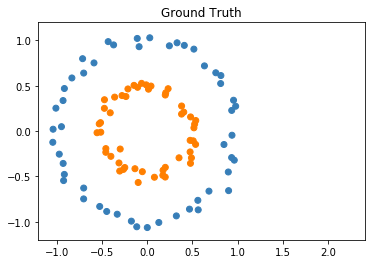

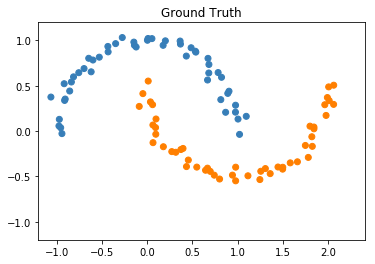

In [122]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# create toy datasets for cluster experiments
n_samples = 100
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
datasets = [noisy_circles, noisy_moons]

X1, y1 = datasets[0]
X2, y2 = datasets[1]

def plot_results(X, y, fignum, title):
    # plot with true labels
    fig = plt.figure()
    plt.title(title)
    colors = ['#377eb8', '#ff7f00']
    y_colors = [colors[label] for label in y]
    plt.scatter(X[:,0], X[:,1], color=y_colors)
    plt.gca().set_aspect('equal')
    plt.xlim(-1.2,2.4)
    plt.ylim(-1.2,1.2)
    plt.show()

plot_results(X1, y1, 1, "Ground Truth")
plot_results(X2, y2, 2, "Ground Truth")

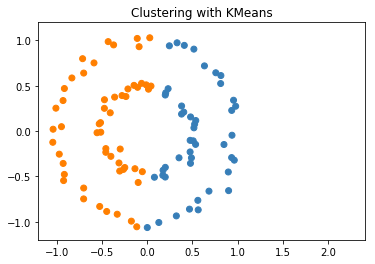

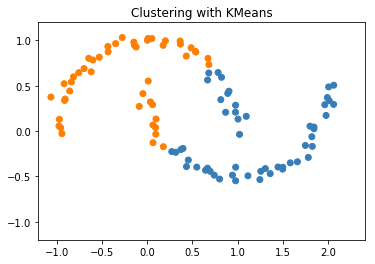

In [123]:
from sklearn.cluster import KMeans

# try clustering with KMeans for comparision
km = KMeans(n_clusters=2)
km.fit(X1)
y_pred = km.labels_

# plot results
plot_results(X1, y_pred, 2, "Clustering with KMeans")

# try clustering with KMeans for comparision
km = KMeans(n_clusters=2)
km.fit(X2)
y_pred = km.labels_

# plot results
plot_results(X2, y_pred, 2, "Clustering with KMeans")

In [124]:
from numpy.linalg import norm
from math import exp

num_clusters = 2
sigma_sq = .01

def affinity_kernel(x1, x2):
    # compute the affinity of samples X1, X2
    return exp(-(norm(x1-x2)**2)/(2*sigma_sq))

# construct affinity matrix
A1 = np.zeros((len(X1), len(X1)))
for i in range(len(X1)-1):
    for j in range(i+1, len(X1)):
        A1[i,j] = affinity_kernel(X1[i], X1[j])
        A1[j,i] = A1[i,j]
        
A2 = np.zeros((len(X2), len(X2)))
for i in range(len(X2)-1):
    for j in range(i+1, len(X2)):
        A2[i,j] = affinity_kernel(X2[i], X2[j])
        A2[j,i] = A2[i,j]

In [125]:
# Construct diagonal degree matrix
D1 = np.zeros(A1.shape)
for i in range(A1.shape[0]):
    D1[i,i] = np.sum(A1[i,:])

D2 = np.zeros(A2.shape)
for i in range(A2.shape[0]):
    D2[i,i] = np.sum(A2[i,:])

In [126]:
# Construct Laplacian Matrix:
#   L = D^{-1/2} A D^{-1/2} --> L[i,j] = -A[i,j]/sqrt(d_i * d_j)

# D^{-1/2}:
D1invsq = np.sqrt(np.linalg.inv(D1))
L1 = np.dot(D1invsq, D1-A1)
L1 = np.dot(L1, D1invsq)

D2invsq = np.sqrt(np.linalg.inv(D2))
L2 = np.dot(D2invsq, D2-A2)
L2 = np.dot(L2, D2invsq)

In [127]:
# Find the K largest eigenvectors of L
eigvals1, eigvects1 = np.linalg.eigh(L1)

best_eigens = [i for i in range(num_clusters)]

L1X = np.zeros((L1.shape[0],num_clusters))
#for i in range(num_clusters):
L1X[:,:] = eigvects1[:,best_eigens]
# normalize new eigenvector-column-matrix
L1X = (L1X.T / np.linalg.norm(L1X, axis=1)).T
#for row in range(len(LX)):
#    LX[row,:] = LX[row,:] / norms[row]

# verify: L v = \lamda v
print("Eigenvalues (L1):")
print(1-eigvals1)

eigvals1, eigvects1 = np.linalg.eigh(np.eye(L1.shape[0]) - L1)
print("Eigenvalues (I-L1):")
print(eigvals1[::-1])

Eigenvalues (L1):
[ 1.          0.99953404  0.99695003  0.99403599  0.98566564  0.98409027
  0.98337353  0.98207078  0.96760305  0.96212913  0.95383121  0.94117024
  0.93655176  0.92004867  0.91111233  0.88472001  0.85855388  0.8520888
  0.79379843  0.75631811  0.70171658  0.69727528  0.65462209  0.56343962
  0.50236574  0.45539696  0.40222458  0.39539396  0.37433897  0.33421949
  0.30658373  0.29382993  0.20274126  0.11816371  0.06997818  0.01685645
 -0.02617514 -0.05088189 -0.06839654 -0.10246715 -0.14048082 -0.14645905
 -0.14971347 -0.15446268 -0.15752153 -0.18186947 -0.18940569 -0.20271471
 -0.20951511 -0.21959879 -0.22007469 -0.22033043 -0.24815388 -0.25755907
 -0.26053316 -0.26383283 -0.26464338 -0.27099641 -0.28104496 -0.28920766
 -0.29382773 -0.29382912 -0.30079226 -0.30947092 -0.31507593 -0.32077501
 -0.33045323 -0.33603576 -0.33966202 -0.35087613 -0.36572599 -0.36760329
 -0.37532698 -0.38339743 -0.38617117 -0.39112025 -0.41082277 -0.41981734
 -0.42664018 -0.42905198 -0.478393

In [128]:
# Find the K largest eigenvectors of L
eigvals2, eigvects2 = np.linalg.eigh(L2)

best_eigens = [i for i in range(num_clusters)]

L2X = np.zeros((L2.shape[0],num_clusters))
#for i in range(num_clusters):
L2X[:,:] = eigvects2[:,best_eigens]
# normalize new eigenvector-column-matrix
L2X = (L2X.T / np.linalg.norm(L2X, axis=1)).T
#for row in range(len(LX)):
#    LX[row,:] = LX[row,:] / norms[row]

# verify: L v = \lamda v
print("Eigenvalues (L2):")
print(1-eigvals2)

eigvals2, eigvects2 = np.linalg.eigh(np.eye(L2.shape[0]) - L2)
print("Eigenvalues (I-L2):")
print(eigvals2[::-1])

Eigenvalues (L2):
[ 1.          0.99996523  0.99465404  0.99376897  0.97961694  0.9784263
  0.96334402  0.9619027   0.93823564  0.92789374  0.89625723  0.8642684
  0.83945271  0.81786326  0.76161998  0.70380216  0.64252692  0.62622503
  0.57444054  0.51690246  0.46494681  0.41893388  0.40027777  0.36249836
  0.28115459  0.21990569  0.19460342  0.18032501  0.18023558  0.14393521
  0.11300389  0.07150517  0.01523841 -0.01148733 -0.02976883 -0.04377751
 -0.06349786 -0.0763926  -0.09207952 -0.13151055 -0.14308215 -0.15158173
 -0.15219021 -0.17333001 -0.19061663 -0.19541505 -0.21429929 -0.22028241
 -0.22146728 -0.22475453 -0.22893741 -0.25738559 -0.26160821 -0.26662384
 -0.26726103 -0.28670655 -0.29000199 -0.29149999 -0.292623   -0.29295953
 -0.29744046 -0.30059341 -0.30246331 -0.30393261 -0.30967897 -0.31269114
 -0.32278465 -0.32403015 -0.32479756 -0.32874923 -0.33004873 -0.33589317
 -0.33643163 -0.33806401 -0.34193224 -0.34663764 -0.34891285 -0.35114563
 -0.3522908  -0.35308889 -0.3551573

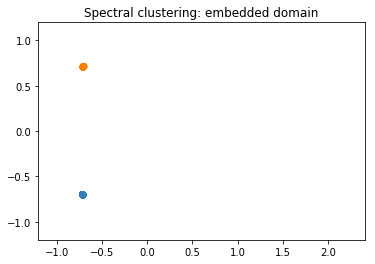

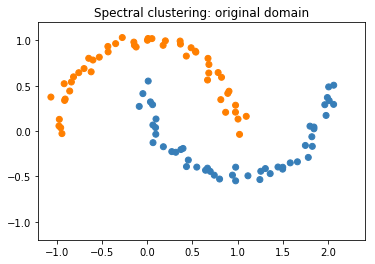

In [129]:
# Finally, do clustering on reduced space using KMeans:
y_pred = KMeans(n_clusters=2).fit_predict(L2X)
#y_pred = [1 if x > 0 else 0 for x in LX]

# plot results
plot_results(L2X, y_pred, 100, "Spectral clustering: embedded domain")
plot_results(X2, y_pred, 4, "Spectral clustering: original domain")

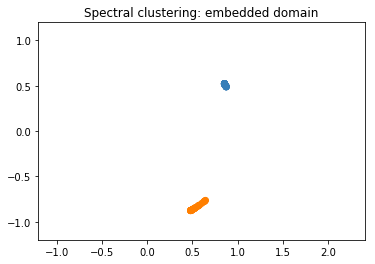

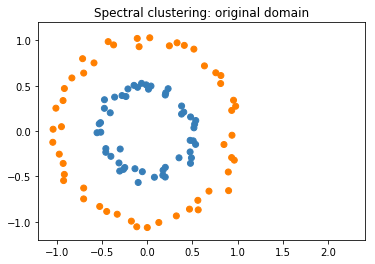

In [130]:
# Finally, do clustering on reduced space using KMeans:
y_pred = KMeans(n_clusters=2).fit_predict(L1X)
#y_pred = [1 if x > 0 else 0 for x in LX]

# plot results
plot_results(L1X, y_pred, 100, "Spectral clustering: embedded domain")
plot_results(X1, y_pred, 4, "Spectral clustering: original domain")